No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


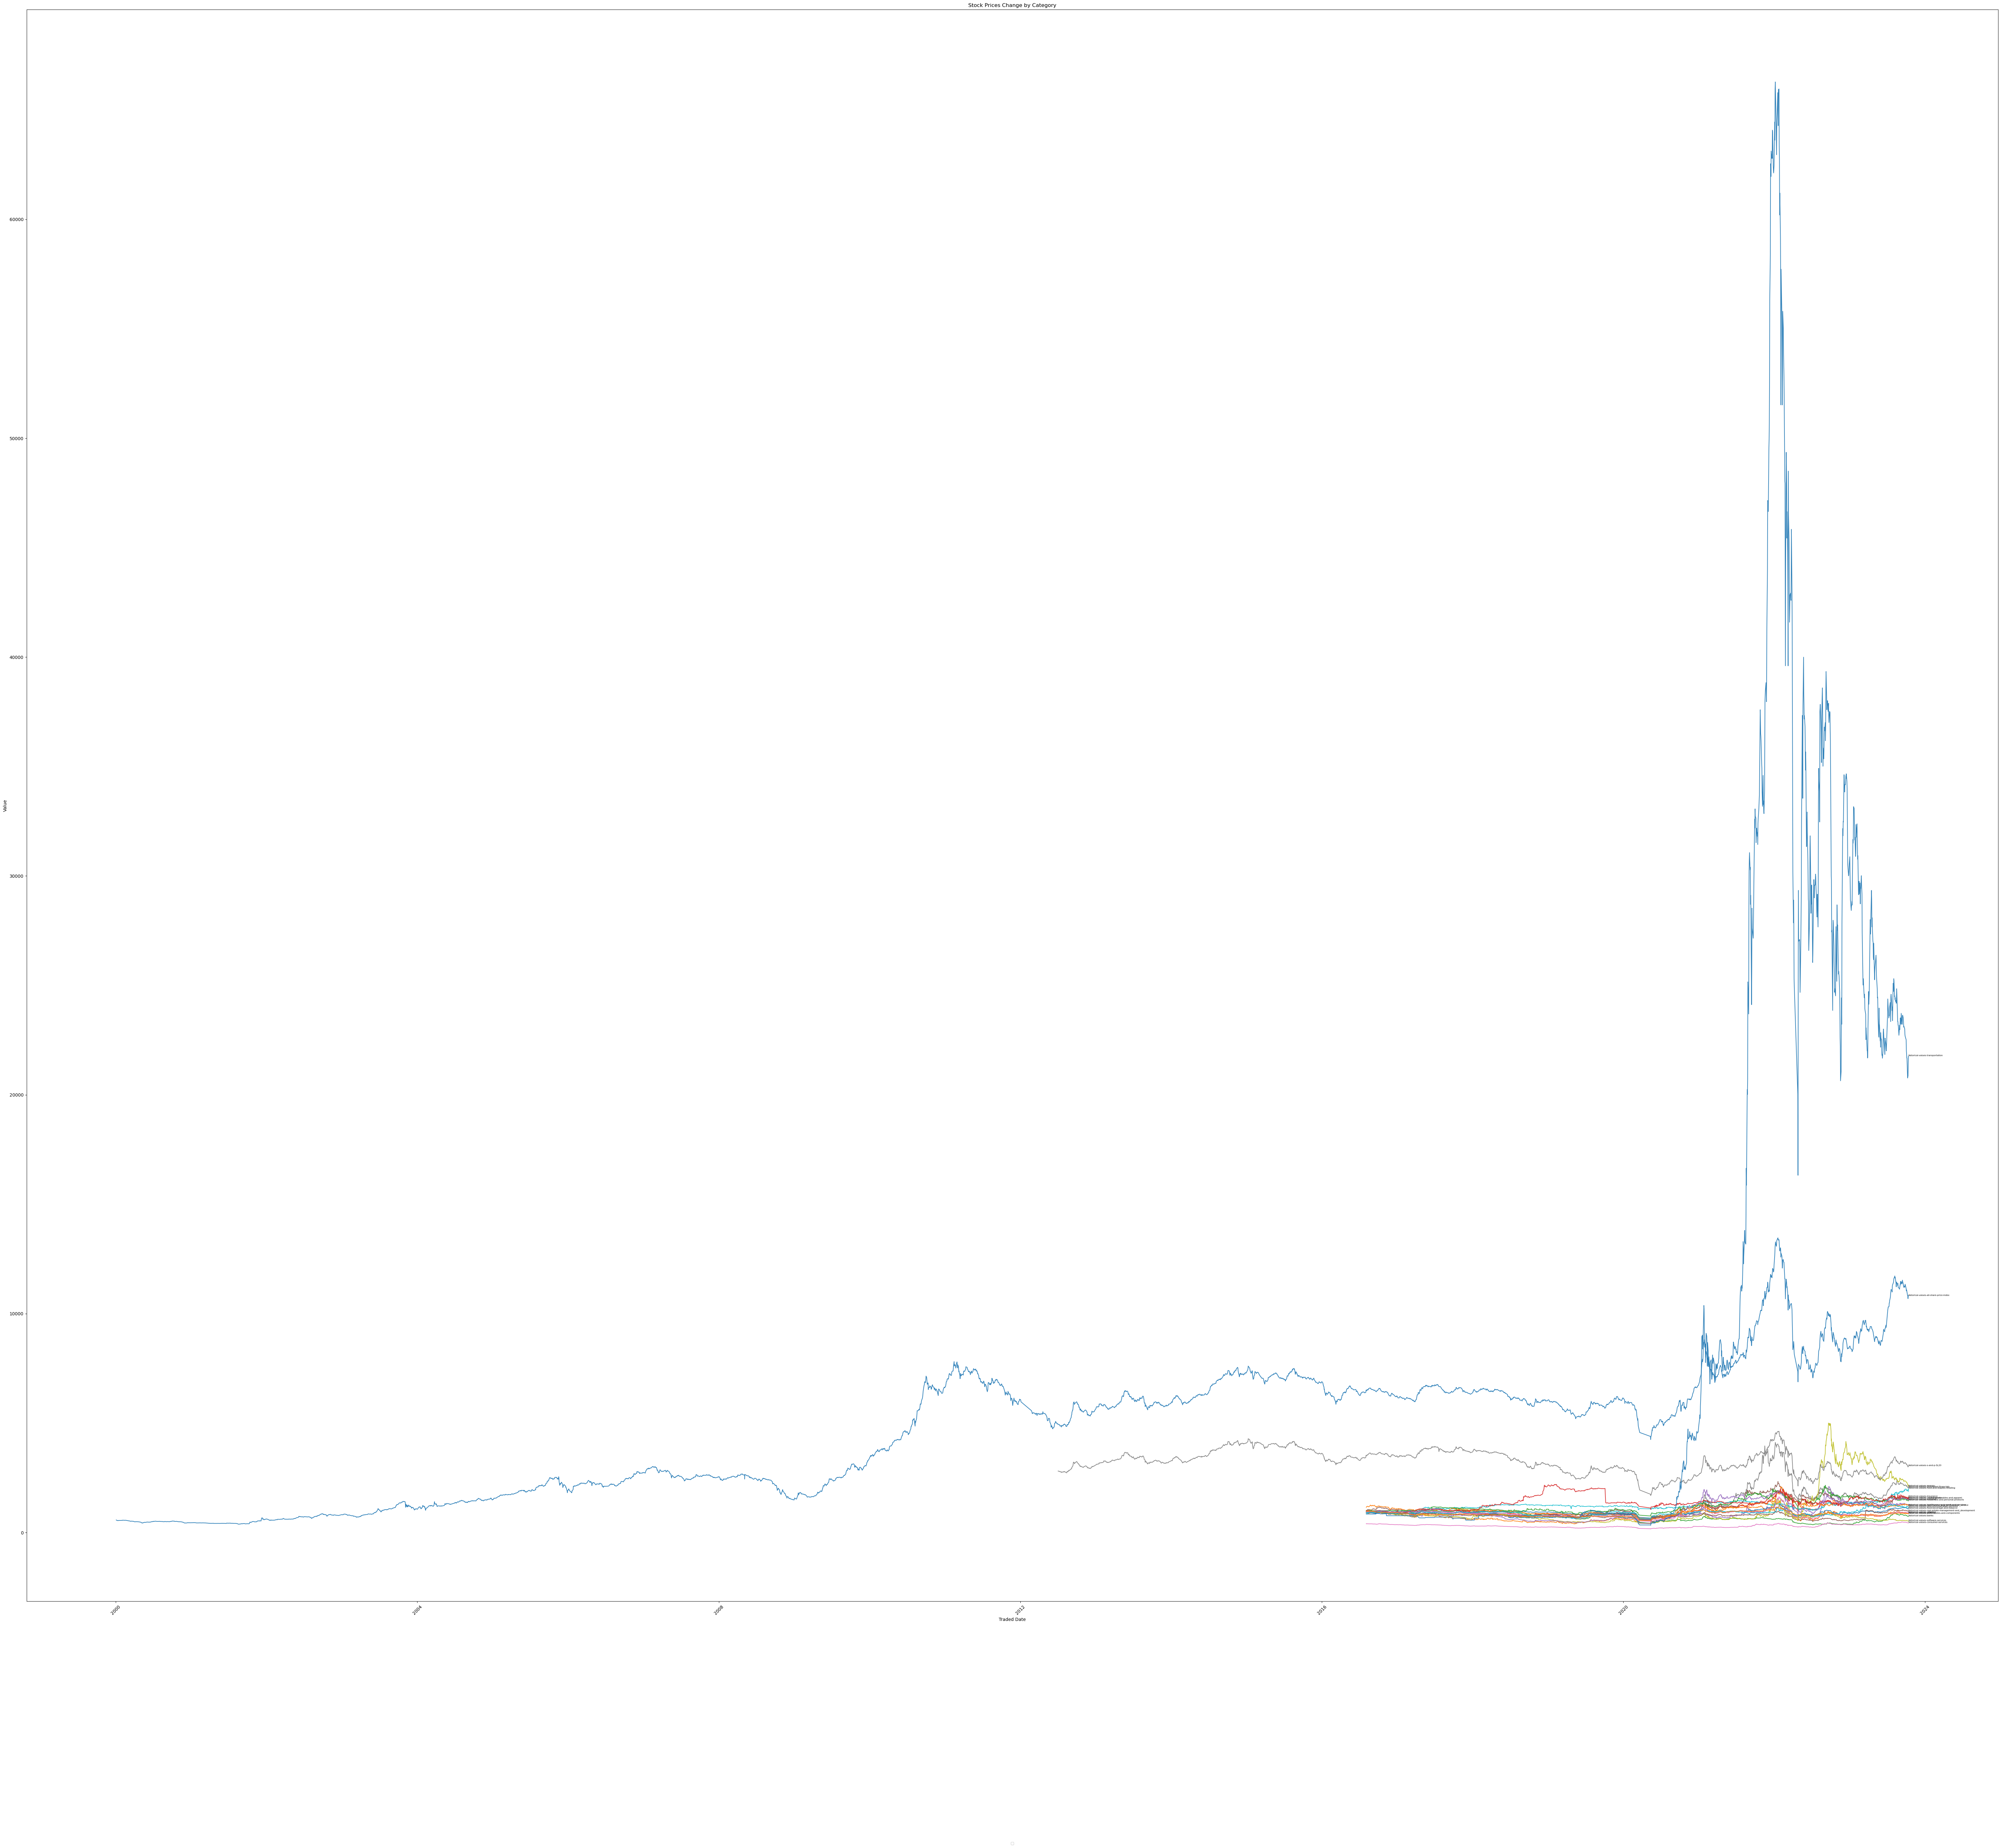

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dateutil.parser import parse

# Define a function to attempt to parse the date
def parse_date(date_str):
    try:
        return parse(date_str)
    except ValueError:
        return None

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../DATASETS/CSE_DATA/LISTED_ENTITIES_INDICES/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the ".csv" extension
    label = os.path.basename(file).replace(".csv", "")
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Select the columns 'Label', 'Trade Date', and 'Close (Rs.)'
selected_columns = ['Label', 'Traded Date', 'Value']
result_df = combined_df[selected_columns]

# Apply date parsing function to 'Trade Date' column
result_df['Traded Date'] = result_df['Traded Date'].apply(parse_date)

# Drop rows with invalid date values
result_df = result_df.dropna(subset=['Traded Date'])

# Sort the DataFrame by 'Label' and 'Trade Date'
result_df = result_df.sort_values(by=['Label', 'Traded Date'])

# Group the data by 'Label' and aggregate the start date, middle date, and last date
grouped_df = result_df.groupby('Label')['Traded Date'].agg(['first', 'median', 'last'])

# Reset the index of the grouped DataFrame
grouped_df.reset_index(inplace=True)

# Create a larger figure for the plot (adjust the dimensions as needed)
plt.figure(figsize=(80, 65))

# Create a plot with a label for each line and annotate the lines with labels
for label, group in result_df.groupby('Label'):
    plt.plot(group['Traded Date'], group['Value'], label='', alpha=0.9)  # Set alpha for transparency
    plt.text(group['Traded Date'].iloc[-1], group['Value'].iloc[-1], label, fontsize=5)

plt.xlabel('Traded Date')
plt.ylabel('Value')
plt.title('Stock Prices Change by Category')

# Set the legend font size to a smaller value
plt.legend(fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # Adjust the parameters as needed

plt.xticks(rotation=45)

# Display the graph with labels on the plotting lines and without ".csv" in label names
plt.show()